In [6]:
conda install -c conda-forge missingno

Solving environment: done

## Package Plan ##

  environment location: /Users/algrhythm/opt/anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    missingno-0.4.2            |             py_1          12 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          12 KB

The following NEW packages will be INSTALLED:

  missingno          conda-forge/noarch::missingno-0.4.2-py_1



missingno-0.4.2      | 12 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime as dta

In [3]:
df_raw = pd.read_csv('https://mod4finalproject.s3.amazonaws.com/zillow_data.csv', index_col=0)

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3901595 entries, 0 to 14722
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   RegionName  int64  
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   Date        object 
 8   Value       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 297.7+ MB


In [12]:
df_raw.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', 'Date', 'Value'],
      dtype='object')

<b>Changing date column to datetime format, renaming "RegionName" column to "Zipcode":</b>

In [13]:
df_raw['Date'] = pd.to_datetime(df_raw['Date'])
df_raw = df_raw.rename(columns={'RegionName':'Zipcode'})

<b>Inspecting Missing Values:</b>

In [14]:
nulls=pd.DataFrame(df_raw.isnull().sum(), columns=['n_null'])
nulls['perc_null (%)'] = round(nulls['n_null']/len(df_raw) *100, 2)
nulls.sort_values(by='perc_null (%)', ascending=False)

,n_null,perc_null (%)
Metro,276395,7.08
Value,156891,4.02
RegionID,0,0.00
Zipcode,0,0.00
City,0,0.00
State,0,0.00
CountyName,0,0.00
SizeRank,0,0.00
Date,0,0.00


<b>Metro and Value seem to have a "smattering" of missing values</b>

In [15]:
df_raw.loc[df_raw['Metro'] == 'Greensboro']

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Value
2765,69235,27205,Asheboro,NC,Greensboro,Randolph,2766,1996-04-01,76900.0
4837,69268,27263,Archdale,NC,Greensboro,Randolph,4838,1996-04-01,72100.0
5111,69233,27203,Asheboro,NC,Greensboro,Randolph,5112,1996-04-01,59500.0
6081,69297,27317,Randleman,NC,Greensboro,Randolph,6082,1996-04-01,71800.0
6574,69322,27370,Trinity,NC,Greensboro,Randolph,6575,1996-04-01,79500.0
...,...,...,...,...,...,...,...,...,...
9833,69313,27350,Sophia,NC,Greensboro,Randolph,9834,2018-04-01,134300.0
10437,69308,27341,Seagrove,NC,Greensboro,Randolph,10438,2018-04-01,94600.0
11268,69258,27248,Franklinville,NC,Greensboro,Randolph,11269,2018-04-01,105100.0
12185,69250,27233,Climax,NC,Greensboro,Randolph,12186,2018-04-01,141700.0


In [16]:
df_raw.loc[df_raw['City'] == 'Greensboro']

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Value
151,69340,27410,Greensboro,NC,NaN,Guilford,152,1996-04-01,137100.0
167,69336,27406,Greensboro,NC,NaN,Guilford,168,1996-04-01,80900.0
526,69337,27407,Greensboro,NC,NaN,Guilford,527,1996-04-01,93900.0
695,69335,27405,Greensboro,NC,NaN,Guilford,696,1996-04-01,74100.0
3027,69354,27455,Greensboro,NC,NaN,Guilford,3028,1996-04-01,111600.0
...,...,...,...,...,...,...,...,...,...
5275,69331,27401,Greensboro,NC,NaN,Guilford,5276,2018-04-01,70700.0
5413,69338,27408,Greensboro,NC,NaN,Guilford,5414,2018-04-01,200800.0
6445,71253,30642,Greensboro,GA,NaN,Greene,6446,2018-04-01,340900.0
8556,69286,27301,Greensboro,NC,NaN,Guilford,8557,2018-04-01,150000.0


In [17]:
#All rows with null value for "Metro"
df_raw.loc[df_raw['Metro'].isnull()]

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Value
151,69340,27410,Greensboro,NC,NaN,Guilford,152,1996-04-01,137100.0
167,69336,27406,Greensboro,NC,NaN,Guilford,168,1996-04-01,80900.0
491,69270,27265,High Point,NC,NaN,Guilford,492,1996-04-01,108000.0
526,69337,27407,Greensboro,NC,NaN,Guilford,527,1996-04-01,93900.0
695,69335,27405,Greensboro,NC,NaN,Guilford,696,1996-04-01,74100.0
...,...,...,...,...,...,...,...,...,...
14684,70215,28775,Scaly Mountain,NC,NaN,Macon,14685,2018-04-01,216700.0
14694,99114,97149,Neskowin,OR,NaN,Tillamook,14695,2018-04-01,413400.0
14710,59210,3812,Bartlett,NH,NaN,Carroll,14711,2018-04-01,228000.0
14717,62697,12720,Bethel,NY,NaN,Sullivan,14718,2018-04-01,117700.0


In [18]:
df_raw.loc[df_raw['Value'].isnull()]

,RegionID,Zipcode,City,State,Metro,CountyName,SizeRank,Date,Value
20,61625,10011,New York,NY,New York,New York,21,1996-04-01,NaN
36,61796,10456,New York,NY,New York,Bronx,37,1996-04-01,NaN
105,84613,60611,Chicago,IL,Chicago,Cook,106,1996-04-01,NaN
156,62048,11238,New York,NY,New York,Kings,157,1996-04-01,NaN
232,69533,27834,Greenville,NC,Greenville,Pitt,233,1996-04-01,NaN
...,...,...,...,...,...,...,...,...,...
14207,85339,62215,Albers,IL,St. Louis,Clinton,14208,2014-06-01,NaN
14267,79020,48157,Luna Pier,MI,Monroe,Monroe,14268,2014-06-01,NaN
14341,79832,49636,Glen Arbor,MI,Traverse City,Leelanau,14342,2014-06-01,NaN
14577,85489,62440,Lerna,IL,Charleston,Coles,14578,2014-06-01,NaN


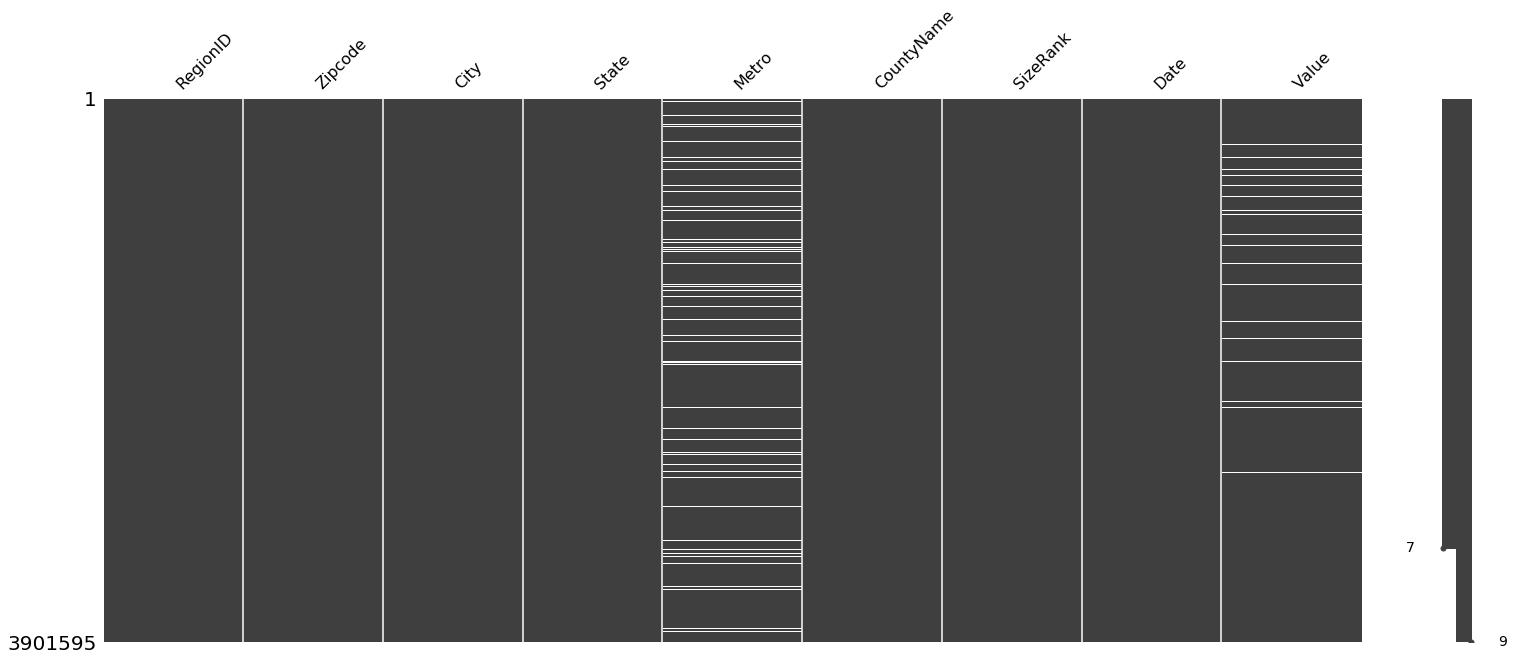

In [19]:
msno.matrix(df_raw)

### Metro and City seem to have significant overlap and ambiguous meaning. Ultimately, both columns are alluding to metropolitan areas. Since this is going to be a time series model, it makes sense to drop the "Metro" for two reasons a) It contrains problematic missing values b) It has significant overlap with the "City" column.

In [20]:
df_value_nulls = df_raw.loc[df_raw['Value'].isnull()]
df_value_nulls['City'].value_counts(),\
df_value_nulls['Date'].value_counts()

(Huntsville       1839
 New York         1152
 Columbus         1118
 Jackson           750
 Oklahoma City     699
                  ... 
 Pocono Pines       87
 San Andreas        87
 Montpelier         21
 Beaverdam          21
 Doswell            15
 Name: City, Length: 907, dtype: int64,
 1996-04-01    1039
 1997-04-01    1039
 1997-01-01    1039
 1997-05-01    1039
 1996-06-01    1039
               ... 
 2014-05-01      56
 2014-01-01      56
 2014-03-01      56
 2014-06-01      56
 2014-04-01      56
 Name: Date, Length: 219, dtype: int64)